# A/B Testing on Online Display Advertising Effect

## Case Background

Lee Hower, a retail company, faces a significant challenge **in measuring the impact of their online advertising on in-store sales.** To tackle this challenge, an experiment has been initiated to evaluate the effectiveness of Lee Hower's online ad campaigns in bridging the gap between online exposure and customer purchases.

The experiment involved randomly assigning 1 million users from Lee Hower's database to either a **"treatment" group exposed to an online ad campaign** or a "control" group. This campaign spanned two weeks and reached 0.5 million users on Yahoo!'s sites, exposing them to Lee Hower's branding advertisements.

The results were compiled into a CSV file, consisting of five columns that included customer nationality, treatment group designation, treatment to treat, as well as their sales figures before and after the experiment.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.power import tt_ind_solve_power as SolPower

from google.colab import drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PS1-MSBA-4000146.csv')
data.head()

,country,treatment,saw_ads,sales,past_sales
0,US,1,0,0.0,0.0
1,UK,0,1,0.0,0.0
2,US,1,1,0.0,0.0
3,UK,1,1,0.0,0.0
4,US,1,0,0.0,0.0


## Methodology

In [ ]:
# Standard deviation of sales in the treatment group
def percent(
    x, percentage):
    result = (percentage / 100) * x
    return "{:.2f}%".format(result)

treatment_sales = data["sales"][data["treatment"] == 1]
std_treatment_sales = treatment_sales.std()
print("The standard deviation of sales in the treatment group is:", round(std_treatment_sales,2))

The standard deviation of sales in the treatment group is: 9.04


## 2. Effect size (with the budget to spend $0.01 per user on advertising)

### 2.a. If the gross margin on sales is 50%, what is the effect size in sales to break even?

To break even with a 50% gross margin and ad budget of \$0.01 per user, we need to find the minimum sales increase per user needed to cover the cost, making the balance of 0. To solve this, \$0.01 = minimum sales increase per user * 0.5, we can get the minimum sales increase per user as \$0.02, therefore, the effect size in sales per user is \$0.02, assuming no normalization.

### 2.b. For a 95% confidence interval, calculate the statistical power to successfully detect the signal for the following three experimental designs:

#### i. 20% of users are assigned to the control group

In [ ]:
np.round(SolPower(effect_size=0.02/9.04,
                  nobs1=500000*0.2, #control
                  alpha=0.05,
                  ratio=0.8/0.2,
                  alternative='two-sided')
, 4)

0.0959

#### ii. 40% of users are assigned to the control group

In [ ]:
np.round(SolPower(effect_size=0.02/9.04,
                  nobs1=500000*0.4, #control
                  alpha=0.05,
                  ratio=0.6/0.4,
                  alternative='two-sided')
, 4)

0.1195

#### iii. 80% of users are assigned to the control group


In [ ]:
np.round(SolPower(effect_size=0.02/9.04,
                  nobs1=500000*0.8, #control
                  alpha=0.05,
                  ratio=0.2/0.8,
                  alternative='two-sided')
, 4)

0.0959

Choosing the 40% of users to the control group is the best desgin, since it has the highest power of 11.95%.

### 2.c. What treatment assignment (%assigned to the control group) maximizes statistical power?


In [ ]:
total_sample_size = 500000
max_power = 0
optimal_control_assignment = None

for control_assignment in range(1, 99, 1):
    control_size = int(total_sample_size * control_assignment / 100)
    treatment_size = total_sample_size - control_size
    power = SolPower(effect_size=0.02,
                     nobs1=control_size,
                     alpha=0.05,
                     ratio=treatment_size/control_size,
                     alternative='two-sided')
    if power > max_power:
       max_power = power
       optimal_control_assignment = control_assignment

print(f"Optimal control group assignment: {optimal_control_assignment}%")

Our analysis shows that assigning 50% of the total sample size to the control group results in the maximum statistical power. This is not surprising as it is a commonly used practice in experiments. By splitting the sample size equally between the treatment and control groups, we ensure that they are of roughly the same size, which helps reduce the variance of the treatment effect estimator. This reduction in variance leads to an increase in statistical power, making it easier to detect a significant difference between the treatment and control groups if there is one.

## 3. Effect size (with a fixed ad budget of $2,000 and free ghost ads)

### a. The average ad spend per person for the three experimental designs above.

In [ ]:
#Average spend of 20%,40% and 80% on control group
#Ad spend per person = (Total ad spend * Treatment proportion) / Number of people in treatment group

#20%
ad_spend_20 = 2000/(500000*0.8)

#40%
ad_spend_40 = 2000/(500000*0.6)

#80%
ad_spend_80 = 2000/(500000*0.2)

ad_spend_20,ad_spend_40,ad_spend_80

(0.005, 0.006666666666666667, 0.02)

### b. Suppose the campaign will break-even and the margin is 50% for each experimental design. To define the benchmark effect size for each of the three designs above.

In [ ]:
#effect_size : budget per user = minimum sales increase per user * 0.5
#20%
effectsize_20 = ad_spend_20/0.5

#40%
effectsize_40 = ad_spend_40/0.5

#80%
effectsize_80= ad_spend_80/0.5

effectsize_20,effectsize_40,effectsize_80

(0.01, 0.013333333333333334, 0.04)

### c. For a 95% confidence interval, what is the statistical power now for each of the three experimental designs

In [ ]:
#power_20
power_20=np.round(SolPower(effect_size=effectsize_20/9.04,
                  nobs1=500000*0.8, #control
                  alpha=0.05,
                  ratio=0.2/0.8,
                  alternative='two-sided')
, 4)

#power_40
power_40=np.round(SolPower(effect_size=effectsize_40/9.04,
                  nobs1=500000*0.6, #control
                  alpha=0.05,
                  ratio=0.4/0.6,
                  alternative='two-sided')
, 4)

#power_80
power_80=np.round(SolPower(effect_size=effectsize_80/9.04,
                  nobs1=500000*0.2, #control
                  alpha=0.05,
                  ratio=0.8/0.2,
                  alternative='two-sided')
, 4)
power_20,power_40,power_80

(0.0613, 0.0804, 0.24)

### d. Which is the best of method in terms of statistical power?

The difference between 2(b) and 3(c) is the assumption about the ad budget. In 2(b), we assume that the ad spend per person is fixed at 0.01, while in 3(c), we have a fixed ad budget of 2,000 to spend on our own ads. As a result, the optimal design changes, and in 3(c), we choose the control group with 20% of the users, which results in the highest statistical power of 24%.

If the goal is to maximize statistical power while keeping the ad spend per user fixed, then design 2(b) with a control group of 40% would be optimal. On the other hand, if the goal is to maximize statistical power while keeping the ad budget fixed, then design 3(c) with a control group of 20% would be optimal.

## 4. Ad fatigue
There is a possibility ads may wear out so that their effectiveness decreases as increasing the average ad spend per consumer.

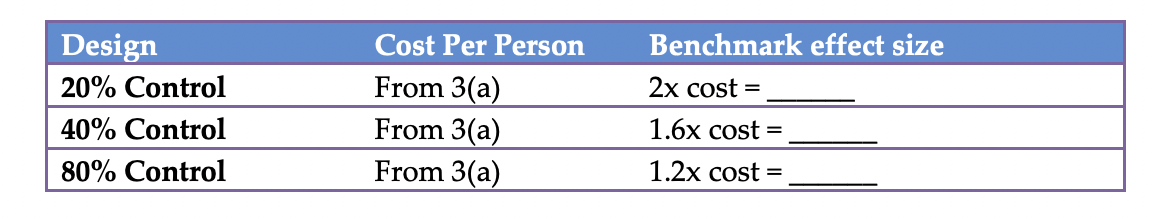

### a. What are the benchmark effect sizes now?

In [ ]:
#effect_size : budget per user = minimum sales increase per user * 0.5
#20%
effectsize_20 = ad_spend_20*2

#40%
effectsize_40 = ad_spend_40*1.6

#80%
effectsize_80= ad_spend_80*1.2

effectsize_20,effectsize_40,effectsize_80

(0.01, 0.010666666666666668, 0.024)

### b. Under your revised assumption, what is the statistical power of each option?

In [ ]:
#power_20
power_20=np.round(SolPower(effect_size=effectsize_20/9.04,
                  nobs1=500000*0.8, #control
                  alpha=0.05,
                  ratio=0.2/0.8,
                  alternative='two-sided')
, 4)

#power_40
power_40=np.round(SolPower(effect_size=effectsize_40/9.04,
                  nobs1=500000*0.4, #control
                  alpha=0.05,
                  ratio=0.6/0.4,
                  alternative='two-sided')
, 4)

#power_80
power_80=np.round(SolPower(effect_size=effectsize_80/9.04,
                  nobs1=500000*0.2, #control
                  alpha=0.05,
                  ratio=0.8/0.2,
                  alternative='two-sided')
, 4)
power_20,power_40,power_80

(0.0613, 0.0693, 0.1167)

Based on the statistical power of 11.67%, it is still recommended to assign 80% of the users to the control group as the optimal treatment assignment.